# Accredian Selection Process Assignment

**Business Context**

This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data. This case requires both statistical analysis and
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the
results of your machine learning model.

### Data Dictionary

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

**Questions**
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

In [56]:
X_resampled.columns

Index(['step', 'amount', 'oldbalanceOrg', 'nameDest', 'oldbalanceDest',
       'isFlaggedFraud', 'TimeDeltaOrig', 'TimeDeltaDest', 'CASH_IN',
       'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype='object')

**Answers**

1- The Data has no missing values, and multicolinearity was dealt with by dropping and converting certain columns. Categorical columns were encoded with One Hot Encoding. New more features wre created from old features.<br>

2- 
**The model has overall accuracy of 92.2%. It has high a recall(98%) in detecting fraud transaction. The model was trained on 70% of the data and tested on 30% which was not used for testing.**

* Introduction: The purpose of this fraud detection model is to distinguish between legitimate and fraulent transaction by looking for patterns indicative of fraud.

* Dataset Description: The dataset used to train the model contains historical transaction data from a financial institution.

* Feature Engineering/ Data Cleaning: Irrelevant and highly correlated data like nameOrig, newbalanceOrig, newbalanceDest were dropped. And useful information were extracted to create new features such as 'TimeDeltaOrig, TimeDeltaDest, nameDest(modified)

* Feature Selection ['step', 'amount', 'oldbalanceOrg', 'nameDest', 'oldbalanceDest', 'isFlaggedFraud', 'TimeDeltaOrig', 'TimeDeltaDest', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'] were selected for training. Based on EDA done with univariate, multivaiate analysis, correlation matrix, etc.

* Model Training: Multiple models were trained and Decision Tree Classifier was selected since it had an accuracy, f1 and recall score of **99.9%**. Further **HyperParmeter Tuning** was done to prevent overfitting.

* Model Evaluation: To evaluate the performance of the fraud detection model, the dataset is split into training and testing sets of **70:30 ratio**. The model was evaluated using K-Fold technique on **MCC accuracy score** Metrics such as accuracy, confusion matrix, precision, recall, F1-score(classification_report) are computed on the test set to assess the model's effectiveness in detecting fraudulent transactions.

* Interpretting the Model: The models feature importance coefficients provide insights into the impact of each feature on the probability of fraud. 
1- Old Balance of the Origin account seems to be the most important factor, wherein account with very high balance are very highly susceptible to fraud.<br>
2- The type of transaction is also a key feature in determining if a transaction could be fraud, CASH_IN and TRANSFER are two types which are really useful in determinging fraud.<br>
3 Transaction amount is also a key feature, wherein transactions of really big amount are never fraud and the fraud tries to hide in the medium-high range.<br>
4- The Time to last transaction of the Destination Account and the type of destination account is also a key feature that helps determine fraud.<br>

* Limitations: Computational Limits prevented me from exploring other more effective techniques like GANs, Boosted Algorithms, etc.

* Future Improvements: To enhance the model's performance, further exploration of other machine learning algorithms and ensemble methods can be considered.(I couldn't because of GPU processing power limitations on my end)

* Conclusion: This Model is capable of categorising transaction with an accuracy of 92.2% and predicts 98% of the fraud transactions accurately. It mainly focuses on 'oldbalanceOrg', 'type' and 'amount' and step to draw the prediction. This model can help financial institutions take premptive measures by predicting and stopping frauds before they happen.


3- Variables were selected on the basis of a series of Univariate, Bivariate and Multivariate visualization along with collinearity coeffecient, summary statistics, etc.

4- 
**Model Performance**

Accuracy:  0.9226100569385514
Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96   1906585
           1       0.94      0.98      0.96   1906060

    accuracy                           0.96   3812645
   macro avg       0.96      0.96      0.96   3812645
weighted avg       0.96      0.96      0.96   3812645



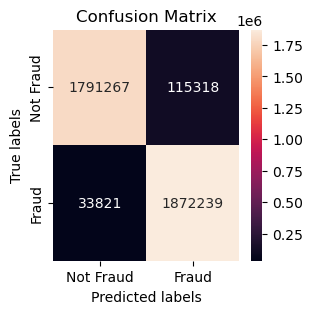

In [57]:
y_pred = tree_cv.predict(X_test)
print('Accuracy: ',tree_cv.score(X_test,y_test))
print('Report:\n',classification_report(y_test, y_pred))
plot_confusion_matrix(y_test,y_pred)

5-
From Interpretting the model it's shown that:
* Old Balance of the Origin account seems to be the most important factor, wherein account with very high balance are very highly susceptible to fraud.<br>
* The type of transaction is also a key feature in determining if a transaction could be fraud, CASH_IN and TRANSFER are two types which are really useful in determinging fraud.<br>
* Transaction amount is also a key feature, wherein transactions of really big amount are never fraud and the fraud tries to hide in the medium-high range.<br>
* The Time to last transaction of the Destination Account and the type of destination account is also a key feature that helps determine fraud.<br>

6-
Yes, these factors make sense for the follwing reasons:

**'oldbalanceOrg'** shows that accounts with higher balance are often targeted probably because they present a more lucrative opportunity to maximize their gains. It also gives a chance to not be noticed, since a small change in big number could be easily missed by the victim.<br>
**'amount'** shows that most fraudsters tend to keep the fraudulent transaction amounts moderate rather than attempting extremely large amount fraudulent transactions. There could be several reasons for this behavior such as 'Avoiding Detection', 'Bypassing Authorization Limits',etc.<br>
**'TransactionType'** this factor is helpful in determining non Fradulent transaction specifically 'CASH_IN' and the "TRANSFER" is where most of the fraud happens.<br>
**'TimeDeltaDest'** which is the time to previous transaction done by the Destination account is a key factor. This is probably because the Fraud performs multiple fraud and has past history which can be used to determine fraud. 

7.What kind of prevention should be adopted while company update its infrastructure?
When a company updates its infrastructure to include a model, several prevention measures needs to be taken such as:

* Scanning Bank accounts' transaction history for pattern of Fraud.
* Emphasising more robust security measures in fronts such as 'Transfer' transaction type.
* Closely Monitoring Accounts with very high balance as they are the most susceptible to fraud.

8.Assuming these actions have been implemented, how would you determine if they work?
To determine if the actions implemented work, one can use a combination of testing, monitoring, and evaluation methods.

Testing and Validation: Conduct testing and validation of the entire updated infrastructure and the integrated model. Ensure that all components are functioning as expected and that the model is providing accurate and reliable predictions.
Comparison with Baselines: Compare the performance of the updated infrastructure and the logistic regression model with the baselines established before the update.
User Feedback and Acceptance: Gather feedback from users who interact with the updated infrastructure and the model to ensure that the changes have met their needs and expectations.

**A model is sucessfully created that predicts fraudulent transaction in a financial organisation with high accuracy.
— Simon Nadar**

### Importing Libraries

In [1]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import any other packages you may want to use
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
# create dataframe
data=pd.read_csv('Fraud.csv')

In [4]:
df=data.copy()

In [5]:
pd.set_option('display.max_colwidth', None)

### Explore, Validate, and Visualize the Data

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
df.shape

(6362620, 11)

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
# checking for null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


*Conclusion- No null values to address

**Univariate Analysis**

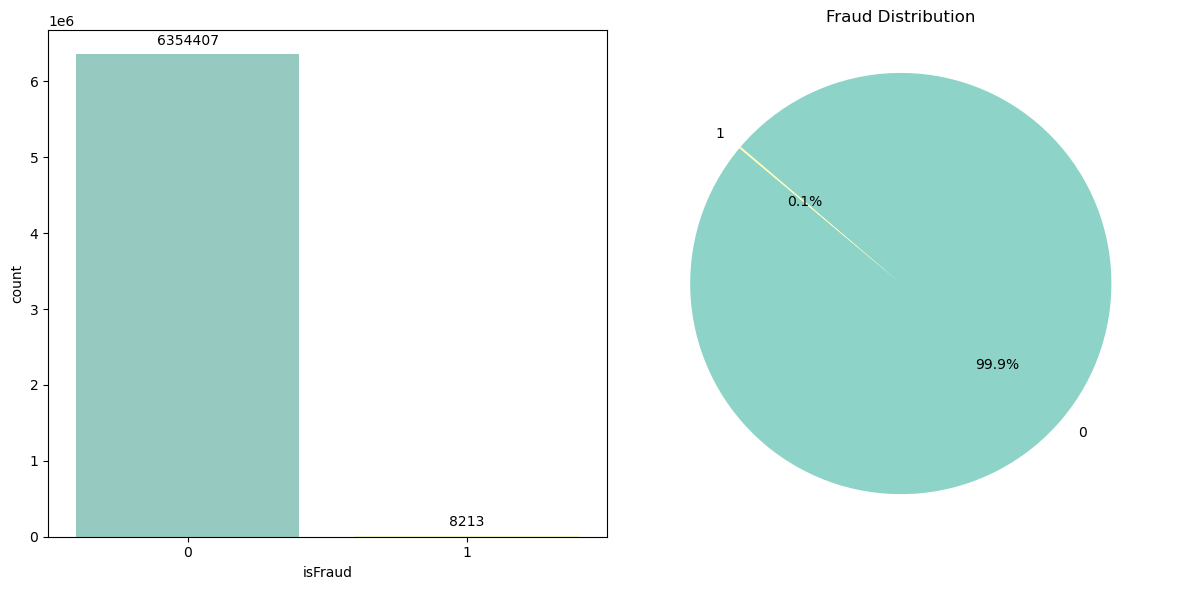

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set3")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot countplot on ax1
sns.countplot(data=df, x='isFraud', ax=ax1)
# Annotate count values on the countplot
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# Plot pie chart on ax2
churn_counts = df['isFraud'].value_counts()
ax2.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Fraud Distribution')
ax2.axis('equal')

plt.tight_layout()
plt.show()

**Note** The data is heavily Imbalanced

In [12]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Feature Engineering
Create two new columns that represent time since last transaction for both Origin and Destination

In [13]:
# Calculate time delta for 'nameOrig'
df['TimeDeltaOrig'] = df.groupby('nameOrig')['step'].diff().fillna(0).astype(int)

# Calculate time delta for 'nameDest'
df['TimeDeltaDest'] = df.groupby('nameDest')['step'].diff().fillna(0).astype(int)

In [14]:
df.TimeDeltaOrig.value_counts()

TimeDeltaOrig
0      6353354
23          86
4           77
2           68
25          66
        ...   
610          1
609          1
437          1
400          1
466          1
Name: count, Length: 574, dtype: int64

**Note** It is noticed that all names in origin have prefix **'C'** whereas destination has **'C'** & **'M'** possibly denoting the recepient type.

In [15]:
# simplyfying the 'nameOrig' & 'nameDest' columns to just the first character
df['nameDest']=df['nameDest'].str[:1]
df['nameOrig']=df['nameOrig'].str[:1]

In [16]:
df['nameOrig'].value_counts()

nameOrig
C    6362620
Name: count, dtype: int64

In [17]:
df['nameDest'].value_counts()

nameDest
C    4211125
M    2151495
Name: count, dtype: int64

In [18]:
df.groupby(['nameDest'])['isFraud'].sum()

nameDest
C    8213
M       0
Name: isFraud, dtype: int64

**Note** nameDest with prefix 'M' have zero fradulent transaction.

**Dropping nameOrig** since relevant data has been extracted from it as the transaction delta

In [19]:
df.drop(['nameOrig'],axis=1,inplace=True)

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>,
        <Axes: title={'center': 'TimeDeltaOrig'}>],
       [<Axes: title={'center': 'TimeDeltaDest'}>, <Axes: >, <Axes: >]],
      dtype=object)

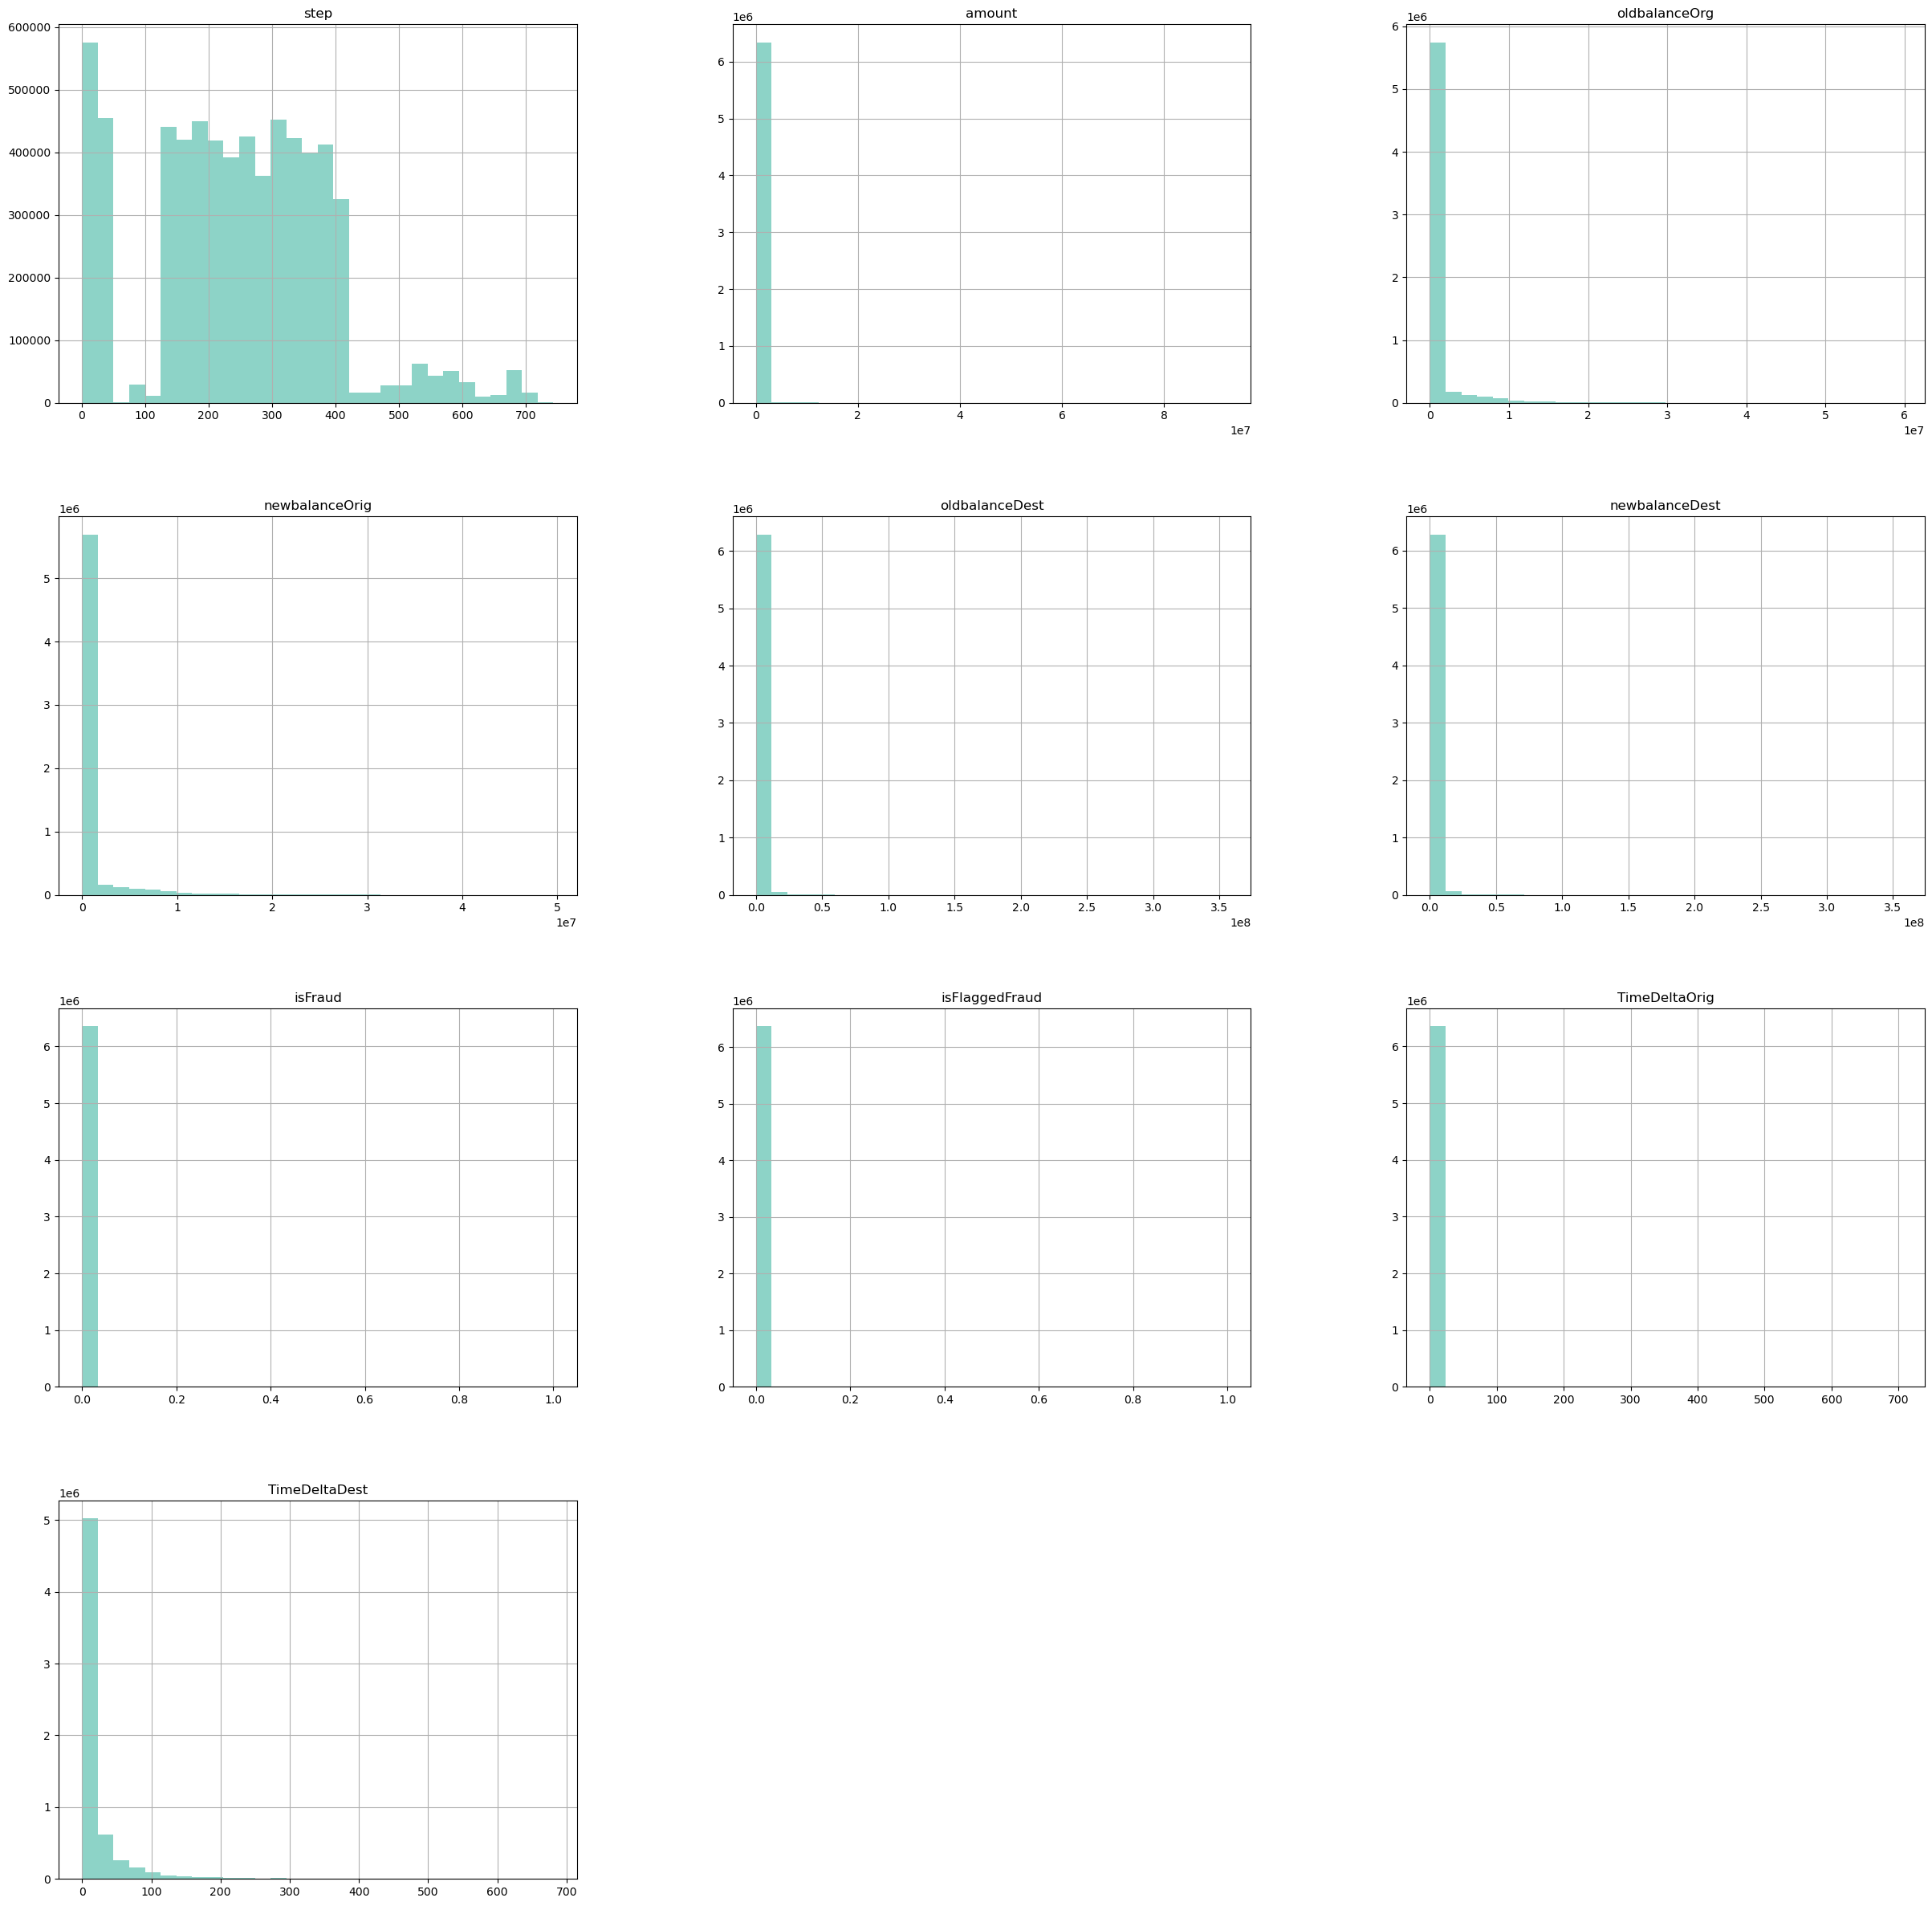

In [20]:
df.hist(bins=30,figsize=(30,30))

In [21]:
df_fraud=df[df['isFraud']==1]

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>,
        <Axes: title={'center': 'TimeDeltaOrig'}>],
       [<Axes: title={'center': 'TimeDeltaDest'}>, <Axes: >, <Axes: >]],
      dtype=object)

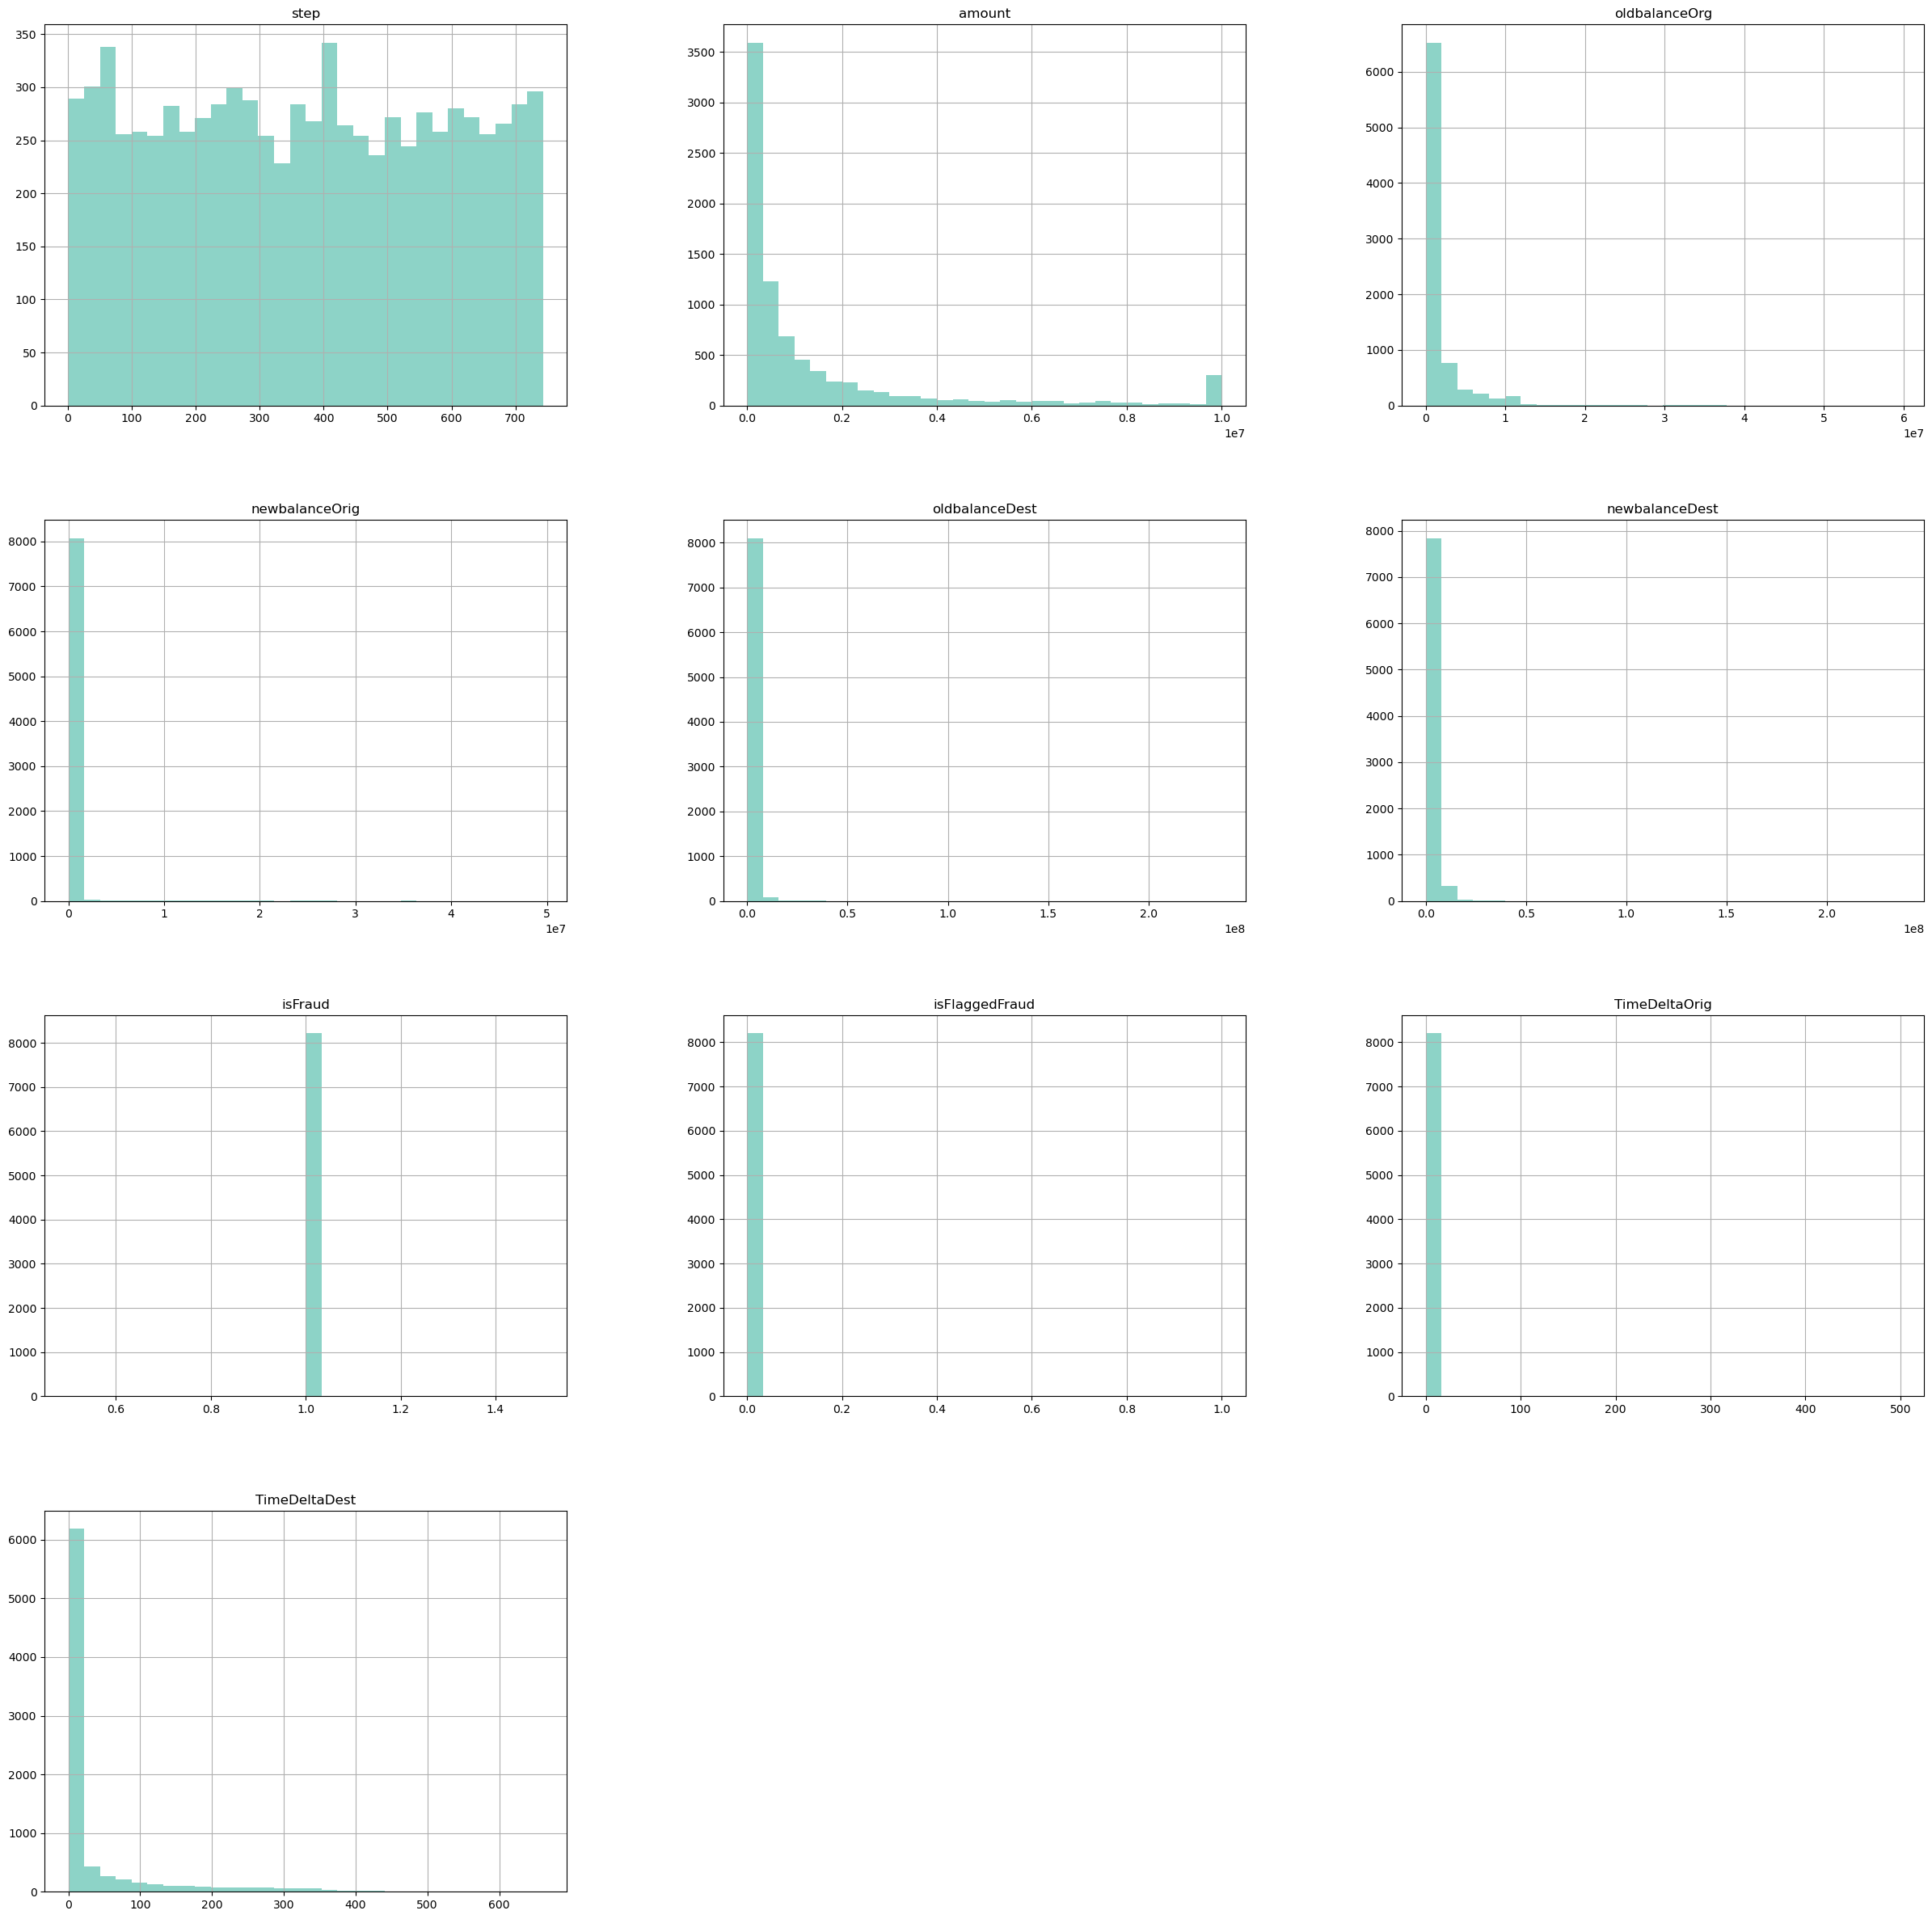

In [22]:
df_fraud.hist(bins=30,figsize=(30,30))

**Multivariate**

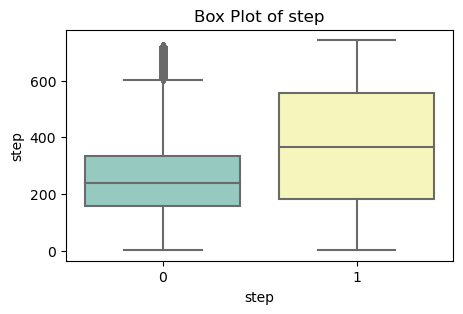

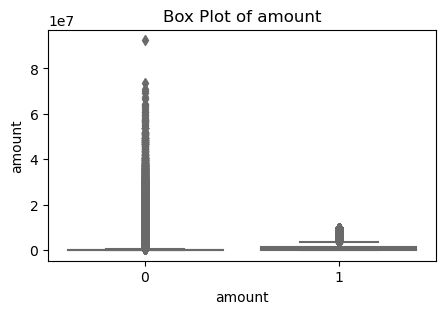

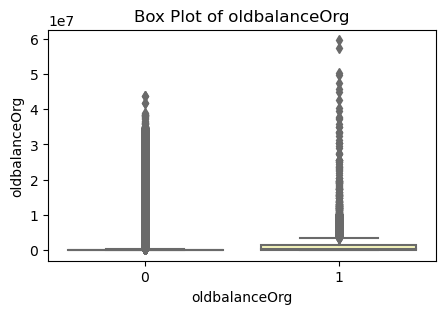

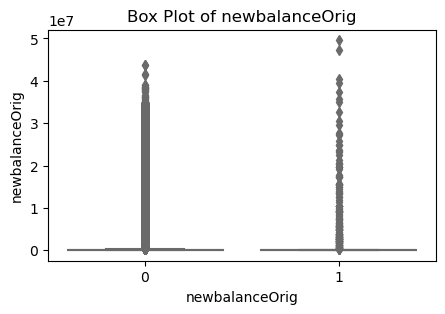

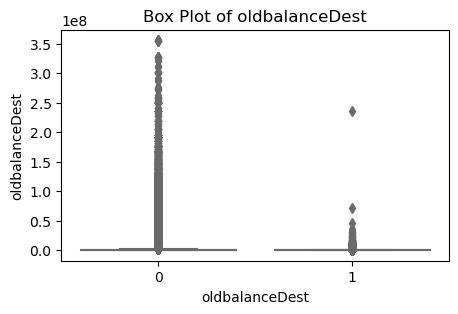

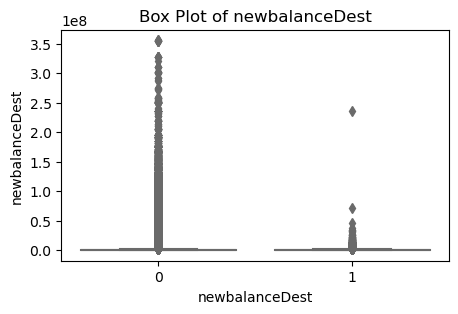

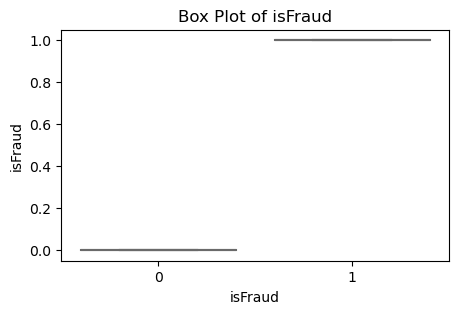

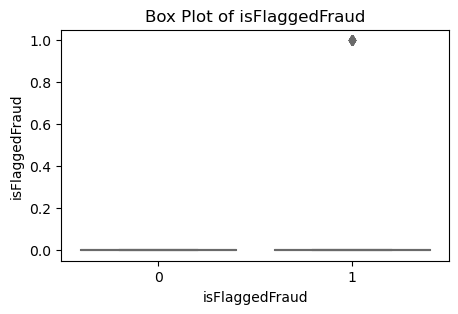

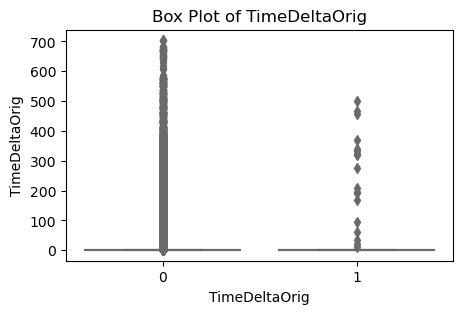

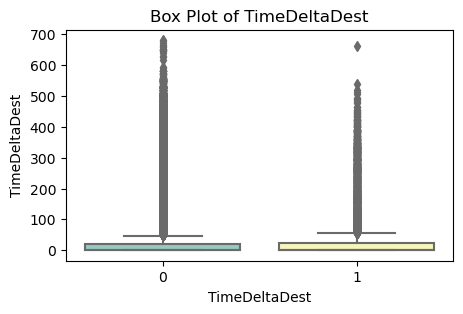

In [23]:
for i in df.select_dtypes(include=['float','int']).columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df,y=i,x='isFraud')
    plt.xlabel(f'{i}')
    plt.title(f'Box Plot of {i}')
    plt.show()

**Categorical Data**

In [24]:
df.select_dtypes(include=['object']).columns

Index(['type', 'nameDest'], dtype='object')

In [25]:
# Calculate the percentage of churn for each category
fraud_percentage = (df[df['isFraud'] == 1]['type'].value_counts() / df['type'].value_counts() * 100).sort_index()
# Calculate the total value count for each category
total_value_count = df['type'].value_counts().sort_index()
fraud_color = sns.color_palette("Set3")[1]

<Axes: xlabel='type'>

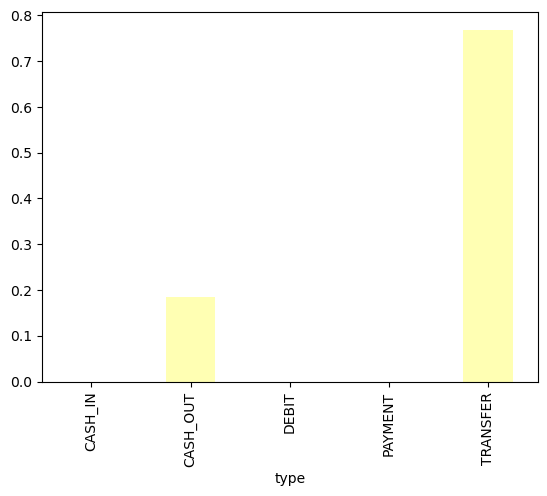

In [26]:
fraud_percentage.plot(kind='bar', color=fraud_color)

### Data Processing

In [27]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,TimeDeltaOrig,TimeDeltaDest
0,1,PAYMENT,9839.64,170136.00,160296.36,M,0.00,0.00,0,0,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,M,0.00,0.00,0,0,0,0
2,1,TRANSFER,181.00,181.00,0.00,C,0.00,0.00,1,0,0,0
3,1,CASH_OUT,181.00,181.00,0.00,C,21182.00,0.00,1,0,0,0
4,1,PAYMENT,11668.14,41554.00,29885.86,M,0.00,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,C,0.00,339682.13,1,0,0,465
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,C,0.00,0.00,1,0,0,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,C,68488.84,6379898.11,1,0,0,489
6362618,743,TRANSFER,850002.52,850002.52,0.00,C,0.00,0.00,1,0,0,0


In [28]:
# label encoding 'nameDest' to 1 and 0 for 'C' and 'M' respectively
class_map={'C': 1, 'M': 0}
df['nameDest']=df['nameDest'].replace(class_map)

In [29]:
# convert object variable to dummy bool variable
dummies=pd.get_dummies(df['type'])

In [30]:
dummies

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
6362615,False,True,False,False,False
6362616,False,False,False,False,True
6362617,False,True,False,False,False
6362618,False,False,False,False,True


In [31]:
newdf=pd.concat([df.drop(['type'],axis=1),dummies],axis=1)

In [32]:
newdf

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,TimeDeltaOrig,TimeDeltaDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0,0.00,0.00,0,0,0,0,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0,0.00,0.00,0,0,0,0,False,False,False,True,False
2,1,181.00,181.00,0.00,1,0.00,0.00,1,0,0,0,False,False,False,False,True
3,1,181.00,181.00,0.00,1,21182.00,0.00,1,0,0,0,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0,0.00,0.00,0,0,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,1,0.00,339682.13,1,0,0,465,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,1,0.00,0.00,1,0,0,0,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,1,68488.84,6379898.11,1,0,0,489,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,1,0.00,0.00,1,0,0,0,False,False,False,False,True


**Correlation Matrix**

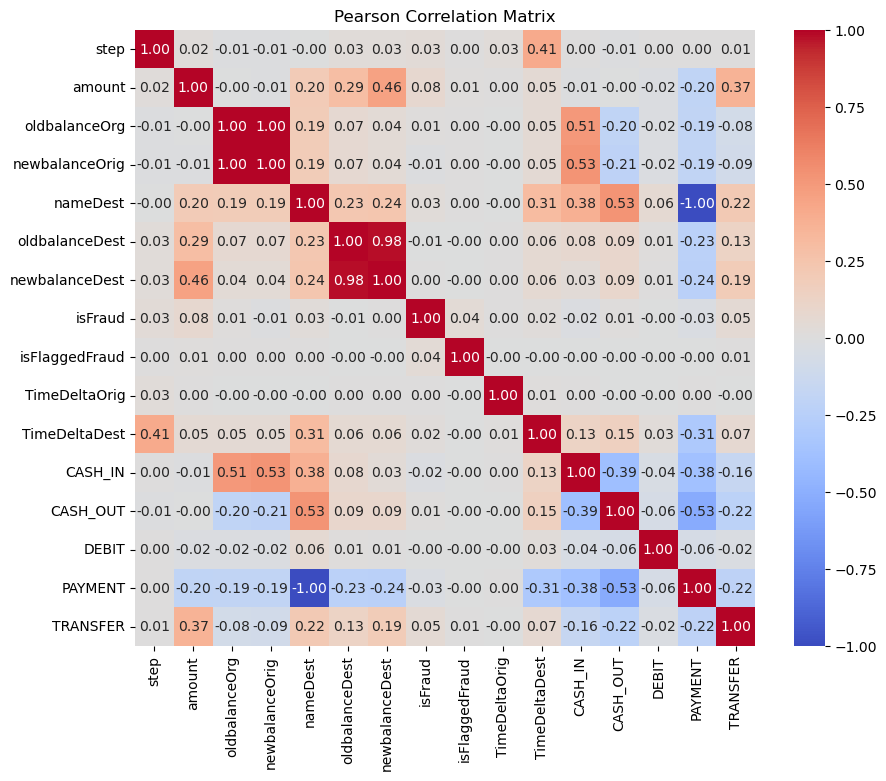

In [33]:
plt.figure(figsize=(10, 8))
# Create a heatmap
sns.heatmap(newdf.corr(method='pearson'), annot=True, cmap="coolwarm", fmt=".2f",vmin=-1, vmax=1)
# Add a title to the plot
plt.title("Pearson Correlation Matrix")
# Show the plot
plt.show()

**Note** Dropping 'newbalanceOrig' and 'newbalanceDest' as they are highly correlated and just a function of amount and oldbalance.

In [34]:
newdf.drop(['newbalanceOrig','newbalanceDest'],axis=1,inplace=True)

**Conclusion** 

1 - Account with high balance are more sucessuptible to fraud.(from oldbalanceOrg and newbalanceOrg Boxplot)<br>
2 - Fraud transaction aren't of very high transaction amount(amount boxplot)<br>
3 - 'Transfer' is the most frequent fraud transaction type, followed by 'Cash_Out'<br>
4 - destination prefixed 'M' have no fraudulent transaction. 

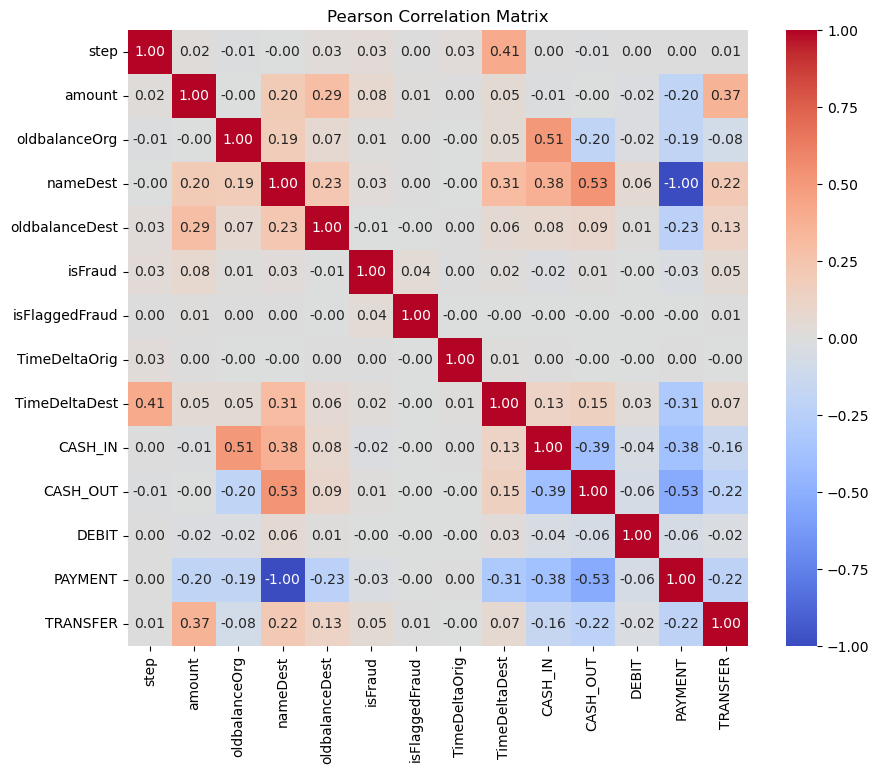

In [35]:
plt.figure(figsize=(10, 8))
# Create a heatmap
sns.heatmap(newdf.corr(method='pearson'), annot=True, cmap="coolwarm", fmt=".2f",vmin=-1, vmax=1)
# Add a title to the plot
plt.title("Pearson Correlation Matrix")
# Show the plot
plt.show()

In [36]:
# split feature and target as X and Y
X=newdf.drop('isFraud',axis=1)
y=newdf['isFraud']

#### Address Class Imbalance

Use SMOTE to address target imbalance in data

In [37]:
# Create a SMOTE object to address class imbalance
smote = SMOTE(sampling_strategy='auto')
# Fit and resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

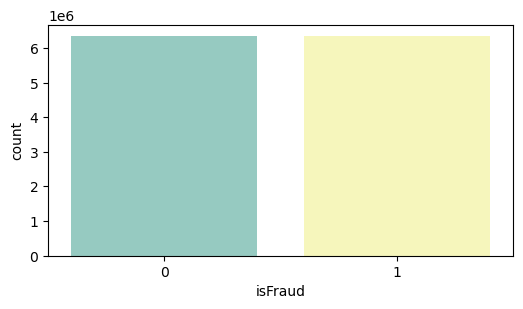

In [38]:
# check data balance
plt.figure(figsize=(6,3))
sns.countplot(x=y_resampled)
plt.show()

### Scaling Data

Using RobustScaler because the data is skewed.

In [39]:
# Initialize RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_resampled)

### Model Building

In [40]:
def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    
    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(3, 3))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
    ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])
    plt.show()


In [41]:
def testmodel(x,y,model):
    '''A function to test different models
    '''
    X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: ',model.score(X_test,y_test))
    print('Report:\n',classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test,y_pred)


#### Logistic Regression

C:\Users\Simon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.9402068564220976
Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94   1270211
           1       0.94      0.94      0.94   1271552

    accuracy                           0.94   2541763
   macro avg       0.94      0.94      0.94   2541763
weighted avg       0.94      0.94      0.94   2541763



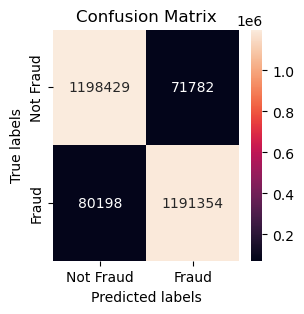

In [42]:
testmodel(X_scaled,y_resampled,model=LogisticRegression())

#### Decision Tree Classifier

Accuracy:  0.9986450349619536
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270711
           1       1.00      1.00      1.00   1271052

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



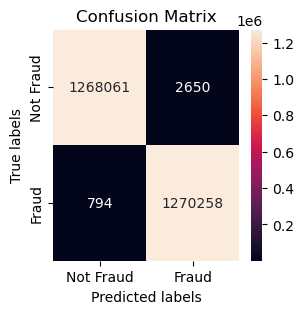

In [43]:
testmodel(X_scaled,y_resampled,model=DecisionTreeClassifier())

#### Model Selection

**Conclusion**: Since Decission Tree had the best accuracy, f1 and recall, it is selected for further processing

### Hyper Parameter Tuning

Here the goal is to prevent overfitting and find the best parameter

In [44]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y_resampled,test_size=0.30)

In [45]:
parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 4, 8],
    'min_samples_split': [2, 10],
    'max_leaf_nodes': [30, 60],
}

tree = DecisionTreeClassifier()

In [46]:
# Define the MCC scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Define the grid search object with MCC scoring
grid_search_tree = GridSearchCV(
    estimator=tree,
    param_grid=parameters_tree,
    scoring=mcc_scorer,
    cv=5
)

# Execute the grid search
tree_cv = grid_search_tree.fit(X_train, y_train)

C:\Users\Simon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Simon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Simon\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Simon\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Simon\anaconda3\Lib\site-packag

In [47]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}
accuracy : 0.9149764484299832


Accuracy:  0.9226100569385514
Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96   1906585
           1       0.94      0.98      0.96   1906060

    accuracy                           0.96   3812645
   macro avg       0.96      0.96      0.96   3812645
weighted avg       0.96      0.96      0.96   3812645



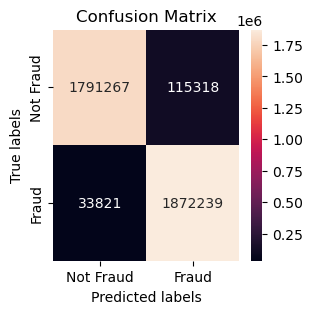

In [48]:
y_pred = tree_cv.predict(X_test)
print('Accuracy: ',tree_cv.score(X_test,y_test))
print('Report:\n',classification_report(y_test, y_pred))
plot_confusion_matrix(y_test,y_pred)

**Note** This model has a lower overall score than previous however this model is designed to addresses overfitting.

### Interpretting the Model
**Model Feature coefficient**

In [49]:
best_tree = tree_cv.best_estimator_
feature_names = X.columns.tolist()

In [50]:
best_tree.feature_importances_
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': best_tree.feature_importances_})
print(coeff_df)

           Feature  Coefficient
0             step     0.032061
1           amount     0.280566
2    oldbalanceOrg     0.407410
3         nameDest     0.064133
4   oldbalanceDest     0.007755
5   isFlaggedFraud     0.000000
6    TimeDeltaOrig     0.000000
7    TimeDeltaDest     0.005672
8          CASH_IN     0.173055
9         CASH_OUT     0.012845
10           DEBIT     0.000000
11         PAYMENT     0.012921
12        TRANSFER     0.003582


[Text(0.5190972222222222, 0.9444444444444444, 'oldbalanceOrg <= -0.084\ngini = 0.5\nsamples = 8896169\nvalue = [4447822, 4448347]\nclass = NotFraud'),
 Text(0.24305555555555555, 0.8333333333333334, 'oldbalanceOrg <= -0.149\ngini = 0.274\nsamples = 3590456\nvalue = [3002187, 588269]\nclass = Fraud'),
 Text(0.2152777777777778, 0.7222222222222222, 'gini = 0.042\nsamples = 1776808\nvalue = [1738606, 38202]\nclass = Fraud'),
 Text(0.2708333333333333, 0.7222222222222222, 'amount <= -0.236\ngini = 0.423\nsamples = 1813648\nvalue = [1263581, 550067]\nclass = Fraud'),
 Text(0.24305555555555555, 0.6111111111111112, 'step <= 0.5\ngini = 0.499\nsamples = 1148457\nvalue = [601363, 547094]\nclass = Fraud'),
 Text(0.1527777777777778, 0.5, 'oldbalanceDest <= 0.0\ngini = 0.468\nsamples = 895155\nvalue = [560351, 334804]\nclass = Fraud'),
 Text(0.05555555555555555, 0.3888888888888889, 'nameDest <= -0.5\ngini = 0.434\nsamples = 681293\nvalue = [464760, 216533]\nclass = Fraud'),
 Text(0.027777777777777776

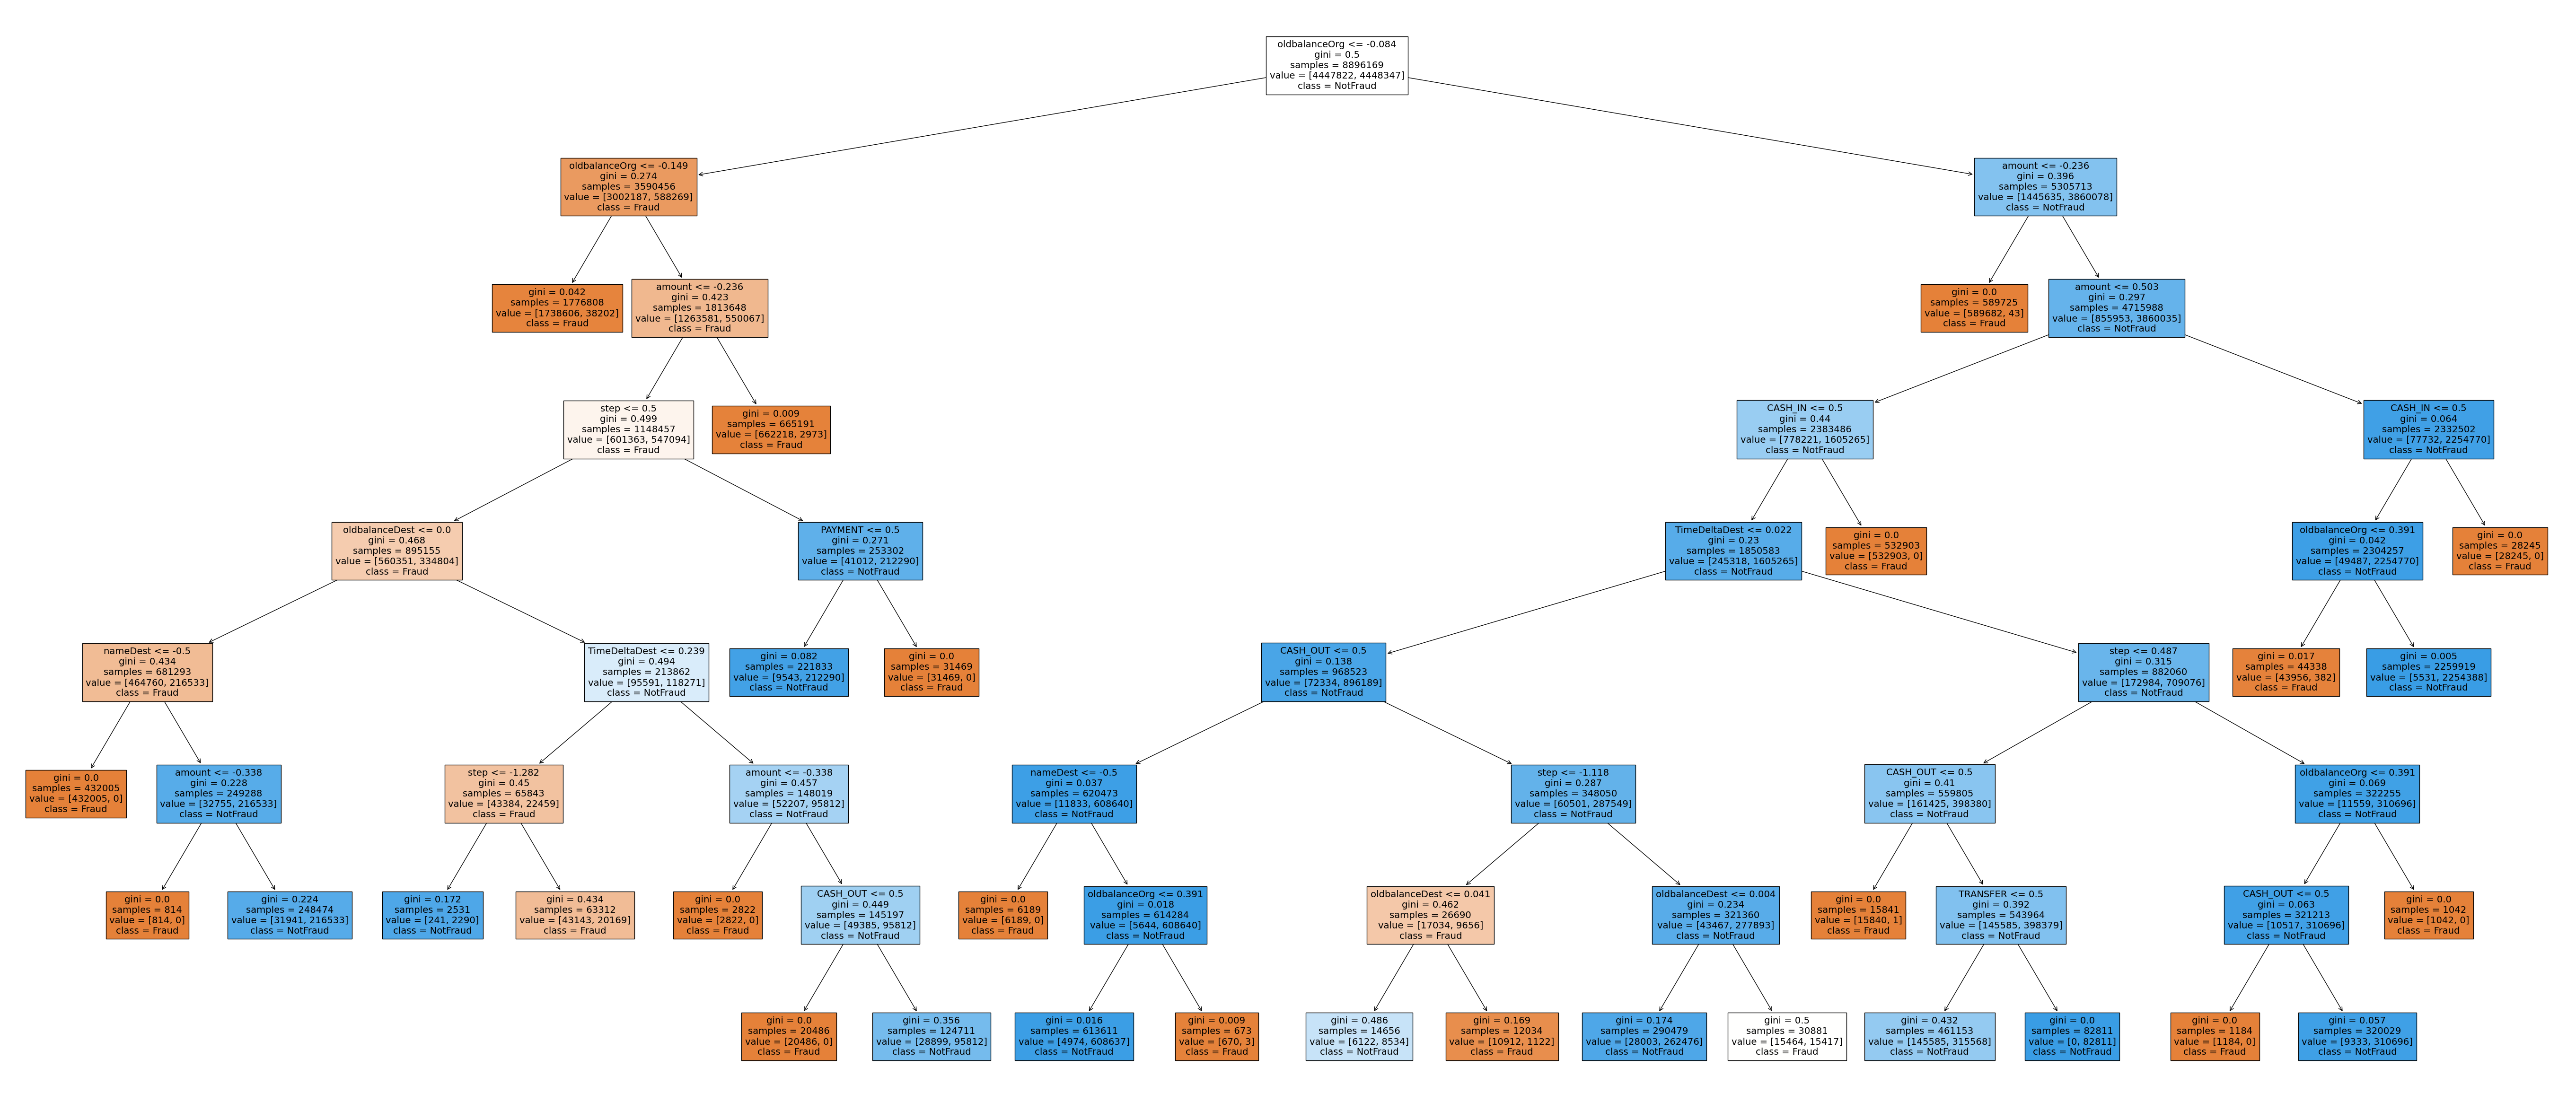

In [51]:
fig, ax = plt.subplots(figsize=(70, 30))
plot_tree(best_tree, feature_names=feature_names, class_names=['Fraud','NotFraud'], filled=True, ax=ax) # Plot the tree

**Conclusion** - 

1- Old Balance of the Origin account seems to be the most important factor, wherein account with very high balance are very highly susceptible to fraud.<br>
2- The type of transaction is also a key feature in determining if a transaction could be fraud, CASH_IN and TRANSFER are two types which are really useful in determinging fraud.<br>
3 Transaction amount is also a key feature, wherein transactions of really big amount are never fraud and the fraud tries to hide in the medium-high range.<br>
4- The Time to last transaction of the Destination Account and the type of destination account is also a key feature that helps determine fraud.<br>

In [52]:
y_pred_df=pd.DataFrame(y_pred)
y_test_df=pd.DataFrame(y_test)

In [53]:
y_pred_df.to_csv('y_pred.csv')
y_test_df.to_csv('y_test.csv')